#introduction for neural network classification
 there are three types of classification
 * binary classification
 * multiclass classification
 * multilabel classification

## creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# make n samples

n_samples = 1000

x,y = make_circles(
    n_samples=n_samples,
    noise=0.03,
    random_state= 42
)


In [ ]:
#check the features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# check labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
import pandas as pd

circles = pd.DataFrame({"x0": x[:,0],"x1":x[:,1],"label": y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


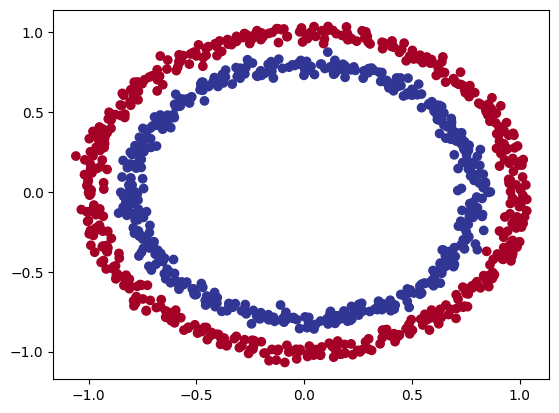

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu);
 

## input and output shape

In [ ]:
# check shapes of features and labels

x.shape,y.shape

((1000, 2), (1000,))

In [ ]:
# how many samples we are working at

len(x),len(y)


(1000, 1000)

## steps in creating the model

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.SGD(),
    metrics=['accuracy']    #accuracy is the percentage it become right
) 

model.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.4510 - accuracy: 0.5080
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 4.6869 - accuracy: 0.5150
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 4.4143 - accuracy: 0.5080
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 1.5772 - accuracy: 0.5040
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7191 - accuracy: 0.5020


In [ ]:
model.fit(x,y,epochs=200,verbose=0)
model.evaluate(x,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

since we are woring with the binary problem and our model is having the accurarcy 0f 50% it's performing as we wish<br>
lets add the extra layer

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_2.fit(x,y,epochs=100,verbose=0)

model_2.evaluate(x,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932522654533386, 0.5]

##improving the model

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_2.fit(x,y,epochs=100,verbose=0)

model_2.evaluate(x,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.7033 - accuracy: 0.5060


[0.7032676339149475, 0.5059999823570251]

In [ ]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

to visualize the model prediction we have the `plot_decision_boundry()`. 
* This function will take the trained model features(x) and label(y)
* meshgrid
*plot the predictions as well as the line between the zones

In [ ]:
import numpy as np

def create_decision_boundries(model,x,y):
  '''
    plot the decision boundry created by the prediction data
  '''
  #finding the maximum and minimum element
  x_min,x_max = x[:,0].min(),x[:,0].max()
  y_min,y_max = x[:,1].min(),x[:,1].max()


  #meshgrid that takes to linespaces

  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  #input as the original values
  x_in = np.c_[xx.ravel(),yy.ravel()]

  #make prediction
  y_pred = model.predict(x_in)
  if len(y_pred[0])>1:
    print("this is multiclassification")
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("this is binary classification")
    y_pred= np.round(y_pred).reshape(xx.shape)
  
  #  plot the decision boundry

  plt.contourf(xx,yy,y_pred,cmap= plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(x[:,0],x[:,1],cmap=plt.cm.RdYlBu,s=40,c=y)


In [ ]:
x_min,x_max = x[:,0].min()-0.1,x[:,0].max()+0.1
y_min,y_max = x[:,1].min()-0.1,x[:,1].max()+0.1
x_min,x_max,y_min,y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [ ]:
xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
xx,yy # xx prints same values in y direction for 100 times and yy does opposite to it
xx.shape

(100, 100)

In [ ]:
a = np.c_[xx.ravel(),yy.ravel()] # it is used to concatenate
a.shape,a # elements are splited to shape actual shape x,y

((10000, 2),
 array([[-1.15950246, -1.16776832],
        [-1.13633868, -1.16776832],
        [-1.1131749 , -1.16776832],
        ...,
        [ 1.08738419,  1.13600368],
        [ 1.11054797,  1.13600368],
        [ 1.13371175,  1.13600368]]))

In [ ]:
x_in = np.c_[xx.ravel(),yy.ravel()]
y_pred = model_2.predict(x_in)
len(y_pred[0]),y_pred

313/313 [==============================] - 1s 1ms/step


(1,
 array([[0.49790677],
        [0.49634156],
        [0.49477655],
        ...,
        [0.5367274 ],
        [0.53516227],
        [0.5335972 ]], dtype=float32))

In [ ]:
y_pred= np.round(y_pred).reshape(xx.shape)
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

(-1.1677683182718437, 1.1360036756154805)

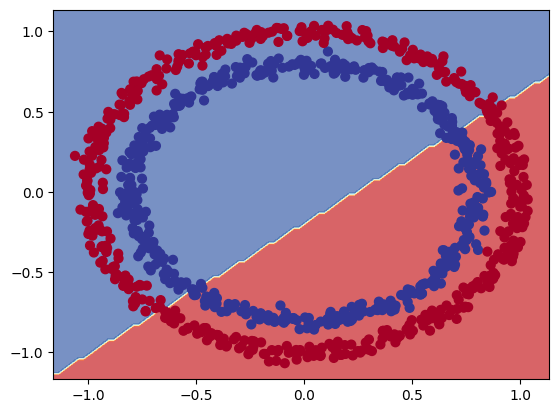

In [ ]:
plt.contourf(xx,yy,y_pred,cmap= plt.cm.RdYlBu,alpha=0.7)
plt.scatter(x[:,0],x[:,1],cmap=plt.cm.RdYlBu,s=40,c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 0s 1ms/step
this is binary classification


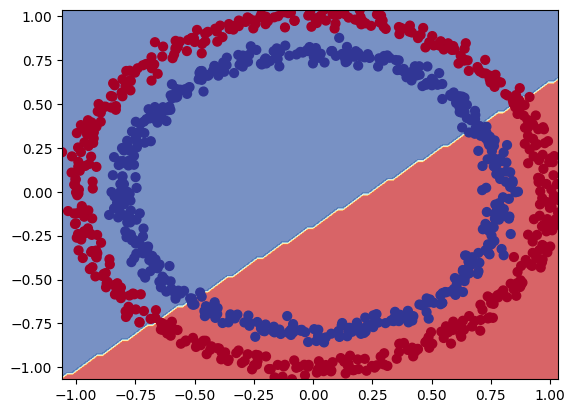

In [ ]:
create_decision_boundries(model=model_2,x=x,y=y)

In [ ]:
x_regression = tf.constant(tf.range(0,1000,5))
y_regression = tf.constant(tf.range(100,1100,5))

x_regression_train = x_regression[:150]
X_regression_test = x_regression[150:]

y_regression_train = y_regression[:150]
y_regression_test = y_regression[150:]

#fit the model to binary classification

model_2.fit(x_regression_train,y_regression_train,epochs=100)

Epoch 1/100


ValueError: ignored

##create a model to fit the regression data

In [ ]:
x_regression_train.shape,y_regression_train.shape

(TensorShape([150]), TensorShape([150]))

In [ ]:
#create a model to create a regression data
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model_2.fit(tf.expand_dims(x_regression_train,axis=-1),y_regression_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 386.9168 - mae: 386.9168
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 249.7582 - mae: 249.7582
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 115.6434 - mae: 115.6434
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 57.5717 - mae: 57.5717
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 88.6505 - mae: 88.6505
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 65.5651 - mae: 65.5651
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 44.1941 - mae: 44.1941
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 49.2588 - mae: 49.2588
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 42.5091 - mae: 42.5091
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 43.5515 - mae: 43.5515
Epoch 11/100
5/5 [==============================] - 0

In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_regression_train,y_regression_train

(<tf.Tensor: shape=(150,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745], dtype=int32)>,
 <tf.Tensor: shape=(150,), dtype=int32, numpy=
 array([100, 105, 110, 115, 120, 125, 130, 1

In [ ]:
tf.expand_dims(x_regression_train,axis=-1)

<tf.Tensor: shape=(150, 1), dtype=int32, numpy=
array([[  0],
       [  5],
       [ 10],
       [ 15],
       [ 20],
       [ 25],
       [ 30],
       [ 35],
       [ 40],
       [ 45],
       [ 50],
       [ 55],
       [ 60],
       [ 65],
       [ 70],
       [ 75],
       [ 80],
       [ 85],
       [ 90],
       [ 95],
       [100],
       [105],
       [110],
       [115],
       [120],
       [125],
       [130],
       [135],
       [140],
       [145],
       [150],
       [155],
       [160],
       [165],
       [170],
       [175],
       [180],
       [185],
       [190],
       [195],
       [200],
       [205],
       [210],
       [215],
       [220],
       [225],
       [230],
       [235],
       [240],
       [245],
       [250],
       [255],
       [260],
       [265],
       [270],
       [275],
       [280],
       [285],
       [290],
       [295],
       [300],
       [305],
       [310],
       [315],
       [320],
       [325],
       [330],
       [335],


In [ ]:
pred = model_2.predict(X_regression_test)

2/2 [==============================] - 0s 4ms/step


In [ ]:
y_regression_test

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 850,  855,  860,  865,  870,  875,  880,  885,  890,  895,  900,
        905,  910,  915,  920,  925,  930,  935,  940,  945,  950,  955,
        960,  965,  970,  975,  980,  985,  990,  995, 1000, 1005, 1010,
       1015, 1020, 1025, 1030, 1035, 1040, 1045, 1050, 1055, 1060, 1065,
       1070, 1075, 1080, 1085, 1090, 1095], dtype=int32)>

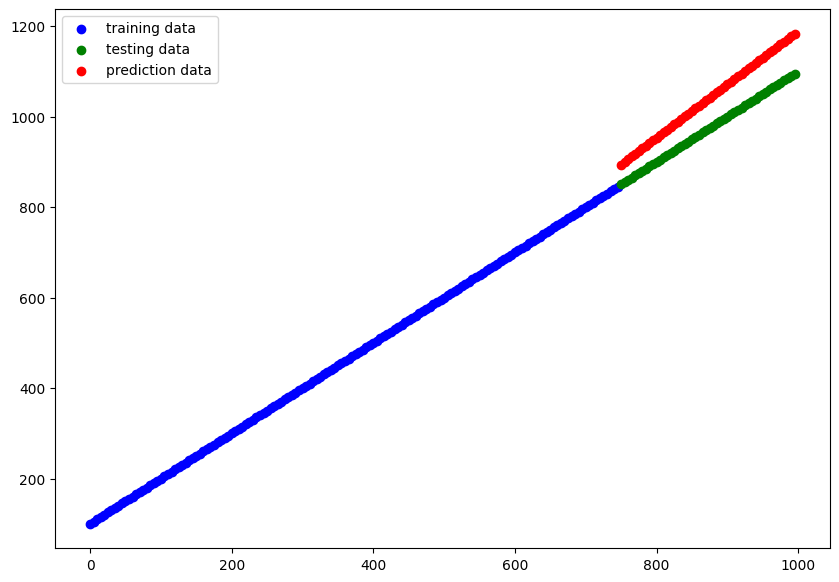

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_regression_train,y_regression_train,c="b",label="training data")
plt.scatter(X_regression_test,y_regression_test,c="g",label="testing data")
plt.scatter(X_regression_test,pred,c="r",label="prediction data")
plt.legend();

## missing peice non linearity

### now we will change the activation function to linear and check the output

In [ ]:
#random_seed

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="linear"),
    tf.keras.layers.Dense(1)
])
model_3.compile(
    loss= tf.keras.losses.binary_crossentropy,
    optimizer= tf.keras.optimizers.Adam(),
    metrics= ["accuracy"]
)

model_3.fit(tf.expand_dims(x,axis=-1),y,epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.5438 - accuracy: 0.5018
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1834 - accuracy: 0.5022
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9161 - accuracy: 0.5007
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7399 - accuracy: 0.4997
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6702 - accuracy: 0.4996
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6057 - accuracy: 0.5001
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5881 - accuracy: 0.4991
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5763 - accuracy: 0.5002
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5643 - accuracy: 0.4986
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5391 - accuracy: 0.4985
Epoch 11/

313/313 [==============================] - 1s 3ms/step
this is multiclassification


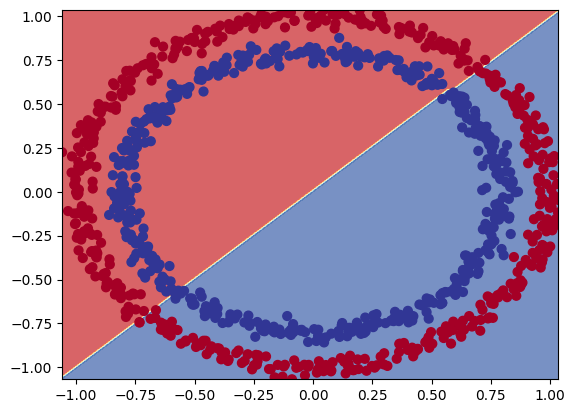

In [ ]:
create_decision_boundries(
    x=x,
    y=y,
    model=model_3
)

### finial output using sigmoid

In [ ]:
#model_4 with activation as relu and more activation steps
# and output activation as sigmoid
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

model_4.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

model_4.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 0.6934 - accuracy: 0.4960
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.4990
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6790 - accuracy: 0.5050
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.5700
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6577 - accuracy: 0.5670
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6458 - accuracy: 0.8710
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.7840
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6046 - accuracy: 0.8700
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.9430
Epoch 11/

313/313 [==============================] - 1s 2ms/step
this is binary classification


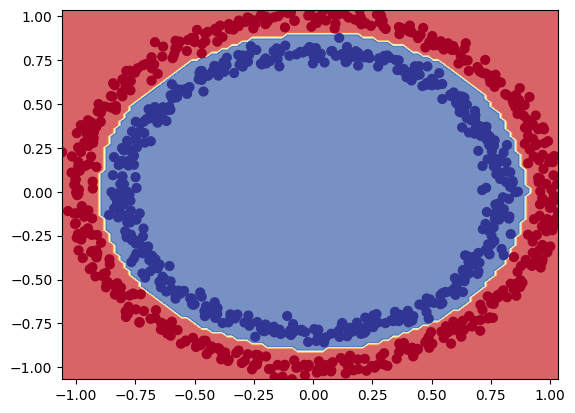

In [ ]:
create_decision_boundries(
    model=model_4,
    x=x,
    y=y
)

##Let's play with the toy tensors by creating different activation

In [ ]:
# create a toy function for chexking the linearity

A = tf.cast(tf.range(-10,10),dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

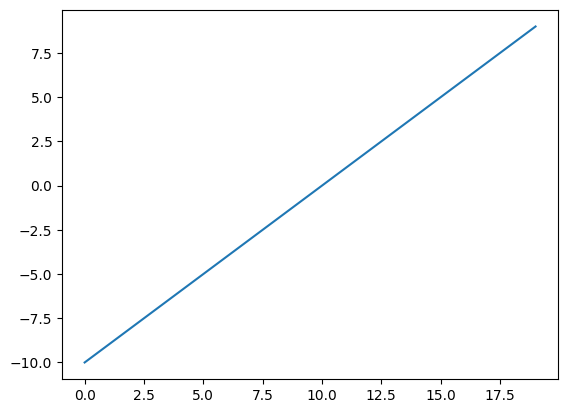

In [ ]:
plt.plot(A)

In [ ]:
#lets start by replicating the sigmoid = 1/1 +exp(-x)

def sigmoid(x):
  return 1/(1+ tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

###Sigmoid graph

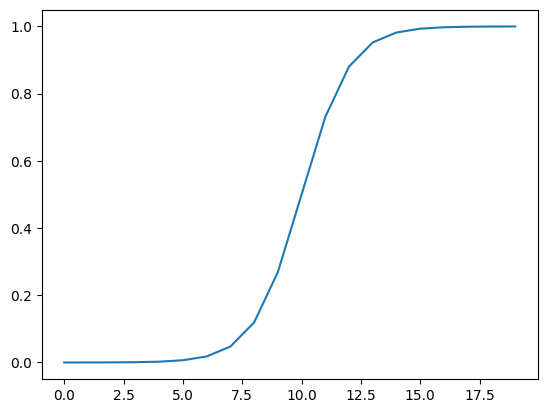

In [ ]:
plt.plot(sigmoid(A))

###relu graph

In [ ]:
def relu(x):
  return tf.maximum(0,x)

relu(A)  

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

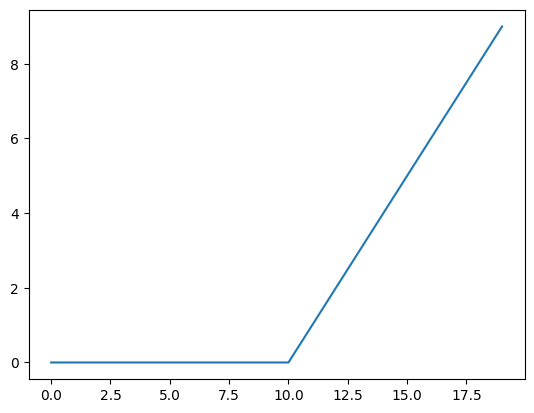

In [ ]:
# lets plot the relu function

plt.plot(relu(A))

### linear activation
***linear activation returns the same tensor***

In [ ]:
tf.keras.activations.linear(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

## call backs for the learning rate


In [ ]:
x_train = x[:800]
y_train = y[:800]
x_test = x[800:]
y_test = y[800:]

x_train.shape

(800, 2)

In [ ]:
tf.random.set_seed(42)
#creating the same model as model_4 for the call back

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics= ['accuracy']
)

# creating callback for the learning function

learn_sheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10**(epochs/20))

history = model_5.fit(x_train,y_train,epochs=100,callbacks=[learn_sheduler])



Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.6961 - accuracy: 0.4800 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4812 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.4775 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.4812 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4888 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4900 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5113 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5113 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

<Axes: xlabel='epochs'>

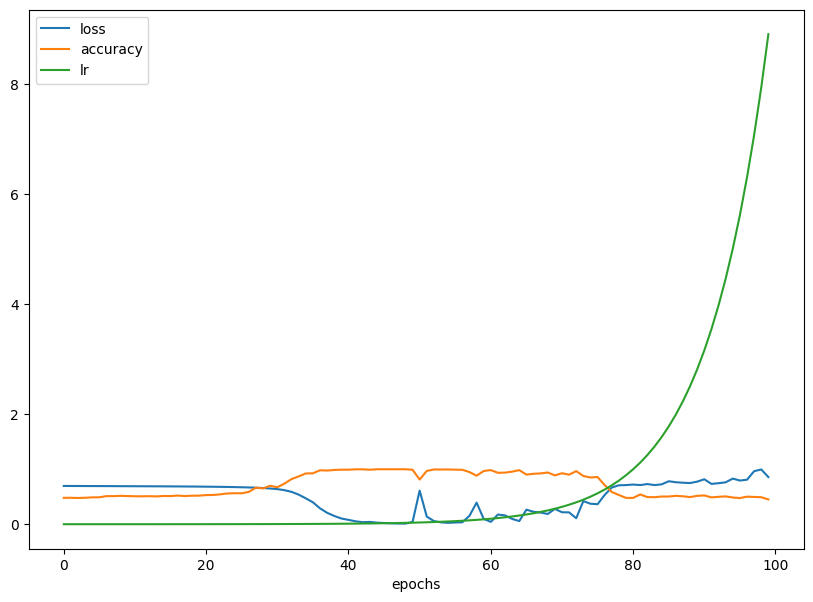

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="epochs")

In [ ]:
# lets check where loss decreases with the learning rate

lr_rate = 1e-4 *(10**(tf.range(100)/20))
lr_rate

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'learning rate versus losses')

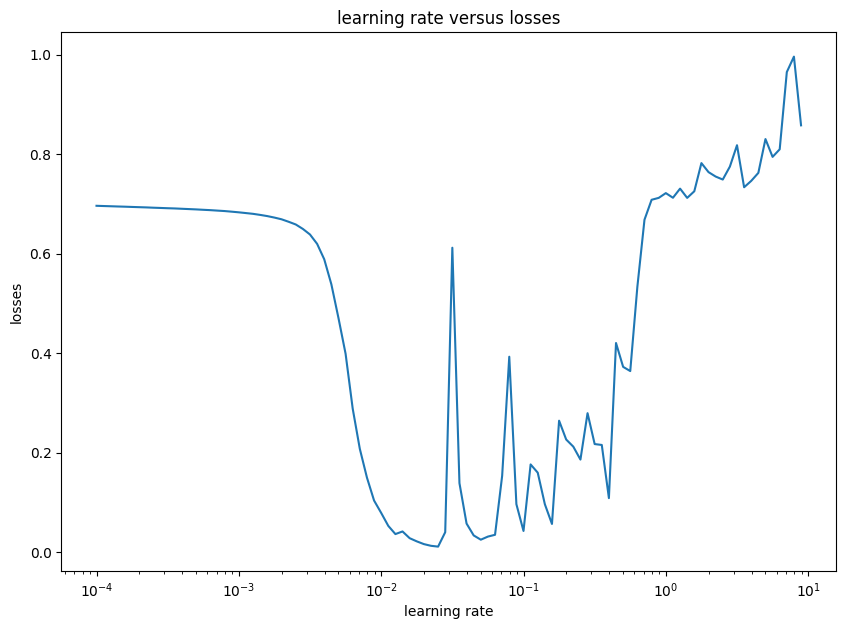

In [ ]:
#lets plot a graph to check the loss versus learning_rate
plt.figure(figsize=(10,7))
plt.semilogx(lr_rate,history.history['loss'])
plt.xlabel("learning rate")
plt.ylabel("losses")
plt.title("learning rate versus losses")


# more classification

* accuracy
* precision
* recall
* F1-score
* confusion matrix
* classification report (from skcit-learn)

In [ ]:
#accuarcy and loss matrix

loss,accuracy = model_4.evaluate(x_test,y_test)

print(f"the accuracy test on the model is {(accuracy * 100):.2f}")
print(f"the loss on the model is {loss}")

7/7 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000
the accuracy test on the model is 100.00
the loss on the model is 0.0051036374643445015


##how about the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# lets predict on the test data

y_pred = model_5.predict(x_test)

# lets create the confusion matrix 

confusion_matrix(y_test,y_pred)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

opps we ran into error because the `different type` from the sigmoid output ie that does not match with the binary

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_pred = model_5.predict(x_test)
y_pred[:10]

7/7 [==============================] - 0s 2ms/step


array([[0.50749004],
       [0.50749004],
       [0.50749004],
       [0.50749004],
       [0.50749004],
       [0.50749004],
       [0.50749004],
       [0.50749004],
       [0.50749004],
       [0.50749004]], dtype=float32)

In [ ]:
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test,tf.round(y_pred))

array([[  0, 101],
       [  0,  99]])

## how to pretify the confusion matrix ?

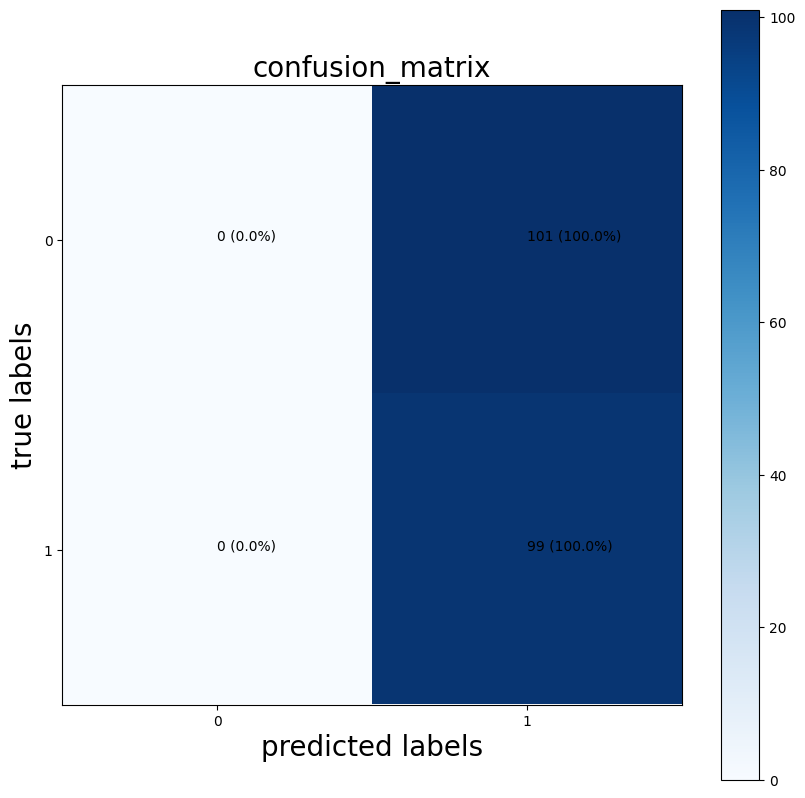

In [ ]:
import itertools

figsize = (10,10)

# create the confussion matrix

cm = confusion_matrix(y_test,tf.round(y_pred))

cm_norm = cm.astype("float") /cm.sum(axis=1)[:,np.newaxis]

n_classes = cm.shape[0]

#lets pretify it

fig,ax = plt.subplots(figsize=figsize)

#create a matrix plots

cax = ax.matshow(cm,cmap=plt.cm.Blues)   # this matshoe is used to show 2d array in color image
fig.colorbar(cax) # this use to show new color bar after figure
#lets create the classes

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

#label the axis

ax.set(title="confusion_matrix",
xlabel= "predicted labels",
ylabel = "true labels",
xticks= np.arange(n_classes),
yticks = np.arange(n_classes),
xticklabels= labels,
yticklabels=labels
)

#axis label position

ax.xaxis.set_label_position("bottom") # by default label is at bottom
ax.xaxis.tick_bottom()

#  set the label size

ax.xaxis.label.set_size(20)

ax.yaxis.label.set_size(20)

ax.title.set_size(20)
#set thresold for the different colors

thresold = (cm.max() + cm.min()) / 2


for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])): #iter tools are similar to the nexted for loop like i in first ,and j in second
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)")





(<Axes: >, <Figure size 1000x1000 with 1 Axes>)

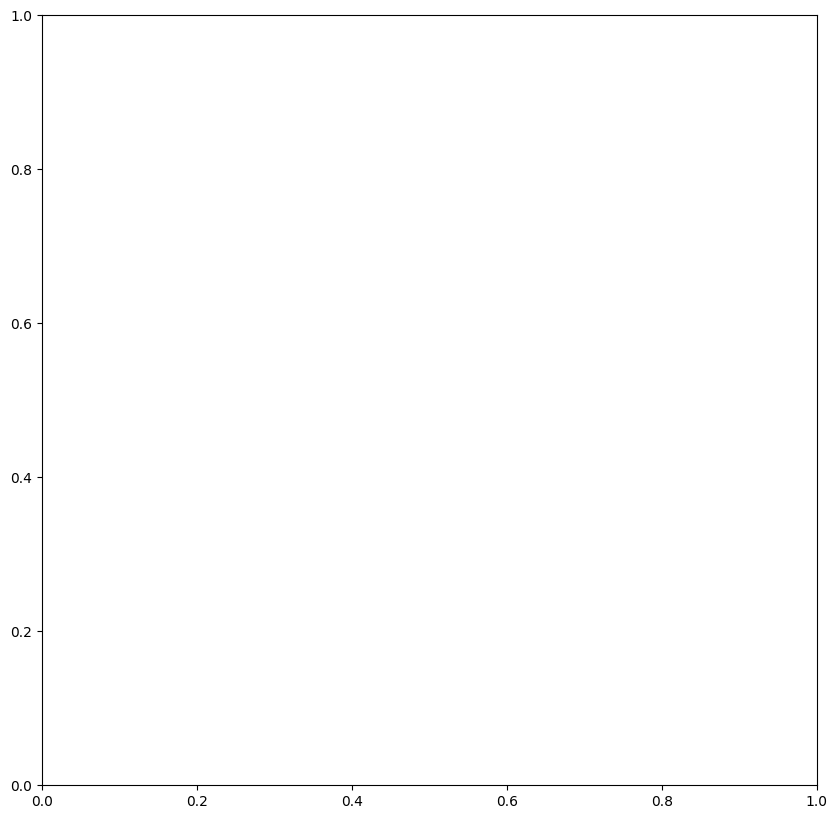

In [ ]:
fig,ax = plt.subplots(figsize=figsize)
ax,fig

In [ ]:
n_classes

2

In [ ]:
cm.astype("float") /cm.sum(axis=1)[:,np.newaxis]

array([[0., 1.],
       [0., 1.]])

In [ ]:
thresold = (cm.max() + cm.min()) / 2
thresold,cm.max(),cm.min() # thresold is the mean of max and min

(50.5, 101, 0)

In [ ]:
np.arange(n_classes)

array([0, 1])

#working with the larger model (multiclass classification)

when you have more than two class are called as **multi-class classification**

* this means if you have more than three classes it's multi-class classification
* it also means if you have 100 different classes are also called as multiclass classifaction

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


# already the fashion dataset is splitted into train and test 

(train_data,train_label),(test_data,test_label) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# check the sample data and training label

print(f"the training data is:\n{train_data[0]}\n")

print(f"the training label is:\n{train_label[0]}\n")


the training data is:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1 

In [3]:
# lets check the shape of the model

train_label[0].shape,train_data.shape[0] # here label are scalar

((), 60000)

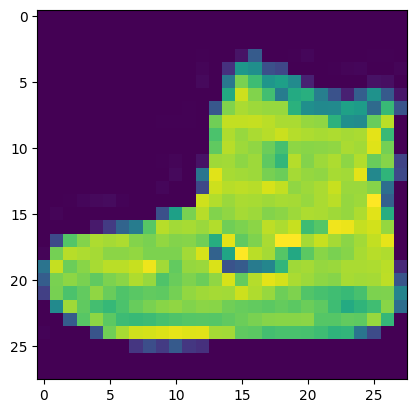

In [4]:
# graphical representation

import matplotlib.pyplot as plt

plt.imshow(train_data[0]); # here ; removes the description text

In [5]:
# we give numebr  labels to the class names

class_names = [
    
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

class_names[9]

'Ankle boot'

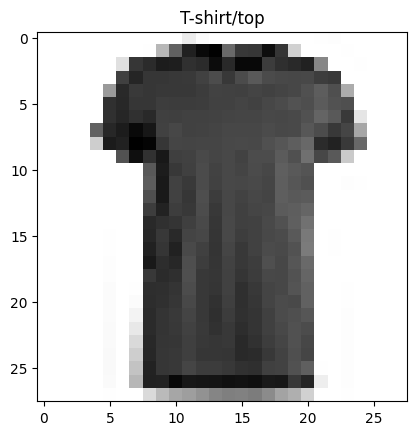

In [6]:
# lets show the image with the title

plt.imshow(train_data[17],cmap= plt.cm.binary) # here binary for gray scale image

plt.title(class_names[train_label[17]]);


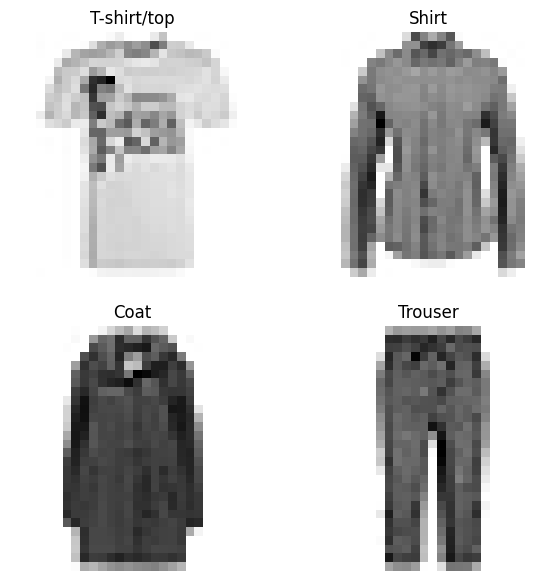

In [7]:
# plot multiple random images

import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap = plt.cm.binary)
  plt.title(class_names[train_label[rand_index]])
  plt.axis(False)

## building the model for the fashion (multi-class classification)

we can use the same architeture as the binary but some of things must be tweaked

* input shape = 28 x 28
* output shape = 10( one per the item) items = 10
* loss function = tf.keras.losses.CategoricalCrossentropy
  * if the label is one-hot encoded use CategoricalCrossentropy()
  *if the label is is integer form use Sparse"----------------"()
* output activation = tf.keras.Activations.softMax



In [8]:
# flattens model to input shape(28 * 28 ) to (None,720)
flatten_model =  tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))
])
flatten_model.output_shape

(None, 784)

In [9]:
#  set random functiob
tf.random.set_seed(42)
# create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
]) 


model_6.compile(
    loss= tf.keras.losses.CategoricalCrossentropy(),# here the sparse because our labels in integer
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

non_norm_history = model_6.fit(train_data,tf.one_hot(train_label,depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_label,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 1.9484 - accuracy: 0.2109 - val_loss: 1.6977 - val_accuracy: 0.2425
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 1.6629 - accuracy: 0.2510 - val_loss: 1.6526 - val_accuracy: 0.2723
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.6355 - accuracy: 0.2622 - val_loss: 1.6267 - val_accuracy: 0.2711
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6166 - accuracy: 0.2779 - val_loss: 1.6104 - val_accuracy: 0.2869
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6134 - accuracy: 0.2825 - val_loss: 1.6746 - val_accuracy: 0.2228
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6024 - accuracy: 0.2860 - val_loss: 1.5904 - val_accuracy: 0.2944
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5973 - accuracy: 0.2865 - val_loss: 1.5973 - val_accura

In [10]:
# find the model summary

model_6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [11]:
# find the max and the min values

train_data.min(),train_data.max()

(0, 255)

In [12]:
train_norm = train_data / 255
test_norm = test_data/255
train_norm.min(),train_norm.max()

(0.0, 1.0)

In [13]:
#  set random functiob
tf.random.set_seed(42)
# create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
]) 


model_7.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),# here the sparse because our labels in integer
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

norm_history = model_7.fit(train_norm,train_label,epochs=10,validation_data=(test_norm,test_label))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0020 - accuracy: 0.6425 - val_loss: 0.7176 - val_accuracy: 0.7594
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6600 - accuracy: 0.7746 - val_loss: 0.6536 - val_accuracy: 0.7736
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6081 - accuracy: 0.7894 - val_loss: 0.6193 - val_accuracy: 0.7850
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5788 - accuracy: 0.7984 - val_loss: 0.6023 - val_accuracy: 0.7919
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5607 - accuracy: 0.8043 - val_loss: 0.5849 - val_accuracy: 0.7942
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5459 - accuracy: 0.8084 - val_loss: 0.5884 - val_accuracy: 0.7962
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5364 - accuracy: 0.8117 - val_loss: 0.5743 - val_accuracy:

<Axes: title={'center': 'noramlized data'}>

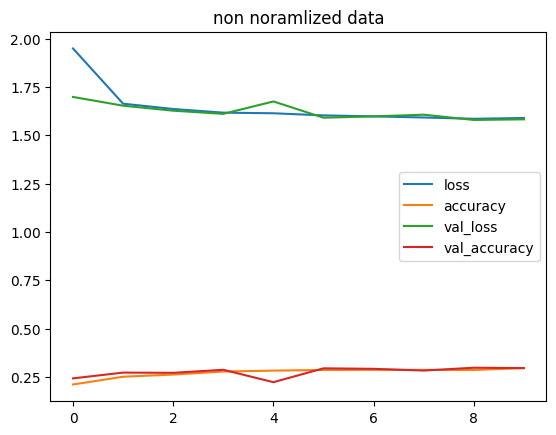

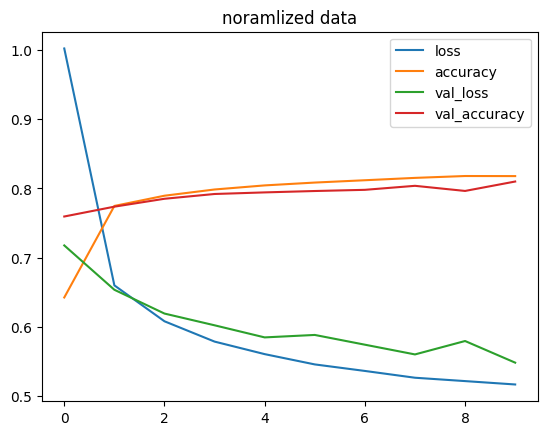

In [14]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="non noramlized data")

pd.DataFrame(norm_history.history).plot(title="noramlized data")


##ideal learning rate 

In [15]:
lr_shedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *(10**(epoch/20)))
find_lr = model_7.fit(
    train_norm,
    train_label,
    epochs=10,
    callbacks=[lr_shedular],
    validation_data=(test_norm,test_label)
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5130 - accuracy: 0.8204 - val_loss: 0.5466 - val_accuracy: 0.8099 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5111 - accuracy: 0.8208 - val_loss: 0.5754 - val_accuracy: 0.7981 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5091 - accuracy: 0.8223 - val_loss: 0.5607 - val_accuracy: 0.8020 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5060 - accuracy: 0.8241 - val_loss: 0.5533 - val_accuracy: 0.8069 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5071 - accuracy: 0.8224 - val_loss: 0.5405 - val_accuracy: 0.8118 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5049 - accuracy: 0.8238 - val_loss: 0.5751 - val_accuracy: 0.7969 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 5s

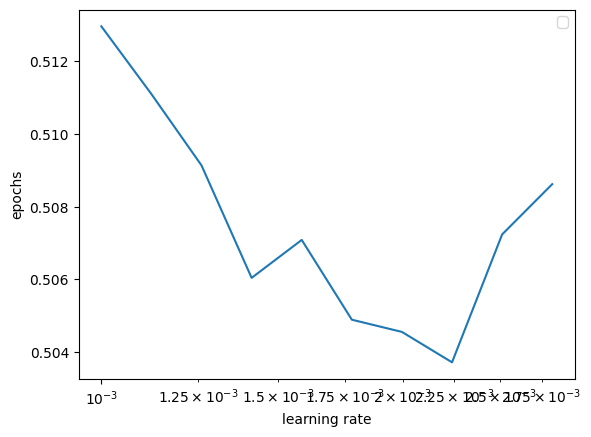

In [16]:
#lets the plot the decade

import numpy as np
import matplotlib.pyplot as plt

lr = 1e-3 * (10 ** (np.arange(10)/20))

plt.semilogx(lr,find_lr.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("epochs")
plt.legend();

## evaluating the model

In [31]:
# lets create the evaluation matrix

import itertools
from sklearn.metrics import confusion_matrix

figsize = (10,10)

def plot_confusion_matrix(y_test,y_pred,classes= None,figsize=(10,10)):
  # create the confussion matrix

  cm = confusion_matrix(y_test,tf.round(y_pred))

  cm_norm = cm.astype("float") /cm.sum(axis=1)[:,np.newaxis]

  n_classes = cm.shape[0]

  #lets pretify it

  fig,ax = plt.subplots(figsize=figsize)

  #create a matrix plots

  cax = ax.matshow(cm,cmap=plt.cm.Blues)   # this matshoe is used to show 2d array in color image
  fig.colorbar(cax) # this use to show new color bar after figure
  #lets create the classes

  

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #label the axis

  ax.set(title="confusion_matrix",
  xlabel= "predicted labels",
  ylabel = "true labels",
  xticks= np.arange(n_classes),
  yticks = np.arange(n_classes),
  xticklabels= labels,
  yticklabels=labels
  )

  #axis label position

  ax.xaxis.set_label_position("bottom") # by default label is at bottom
  ax.xaxis.tick_bottom()

  #  set the label size

  ax.xaxis.label.set_size(20)

  ax.yaxis.label.set_size(20)

  ax.title.set_size(20)
  #set thresold for the different colors

  thresold = (cm.max() + cm.min()) / 2


  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])): #iter tools are similar to the nexted for loop like i in first ,and j in second
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)")



In [28]:
# lets predict the values

y_probs = model_7.predict(test_norm)
y_pred = y_probs.argmax(axis=1)
tf.round(y_probs[:5]),test_label[:5],y_probs[:5].argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


(<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>,
 array([9, 2, 1, 1, 6], dtype=uint8),
 array([9, 2, 1, 1, 6]))

wonderful we made the prediction on the test data for y_labels

In [29]:
#lets plot the confusion mat
from sklearn.metrics import confusion_matrix

confusion_matrix(test_label,y_pred)

array([[785,   2,  17,  94,   3,   0,  76,   4,  19,   0],
       [  2, 949,   9,  37,   3,   0,   0,   0,   0,   0],
       [ 18,   8, 718,  20, 173,   0,  56,   0,   7,   0],
       [ 32,  20,  11, 881,  18,   4,  28,   3,   3,   0],
       [  1,   9, 117,  54, 774,   0,  41,   0,   4,   0],
       [  0,   0,   0,   0,   0, 902,   0,  61,   4,  33],
       [199,   5, 157,  70, 187,   0, 364,   2,  16,   0],
       [  0,   0,   0,   0,   0,  27,   0, 936,   0,  37],
       [ 12,   1,  25,   5,   1,  28,  10,   4, 910,   4],
       [  0,   0,   0,   0,   0,  24,   0,  58,   2, 916]])

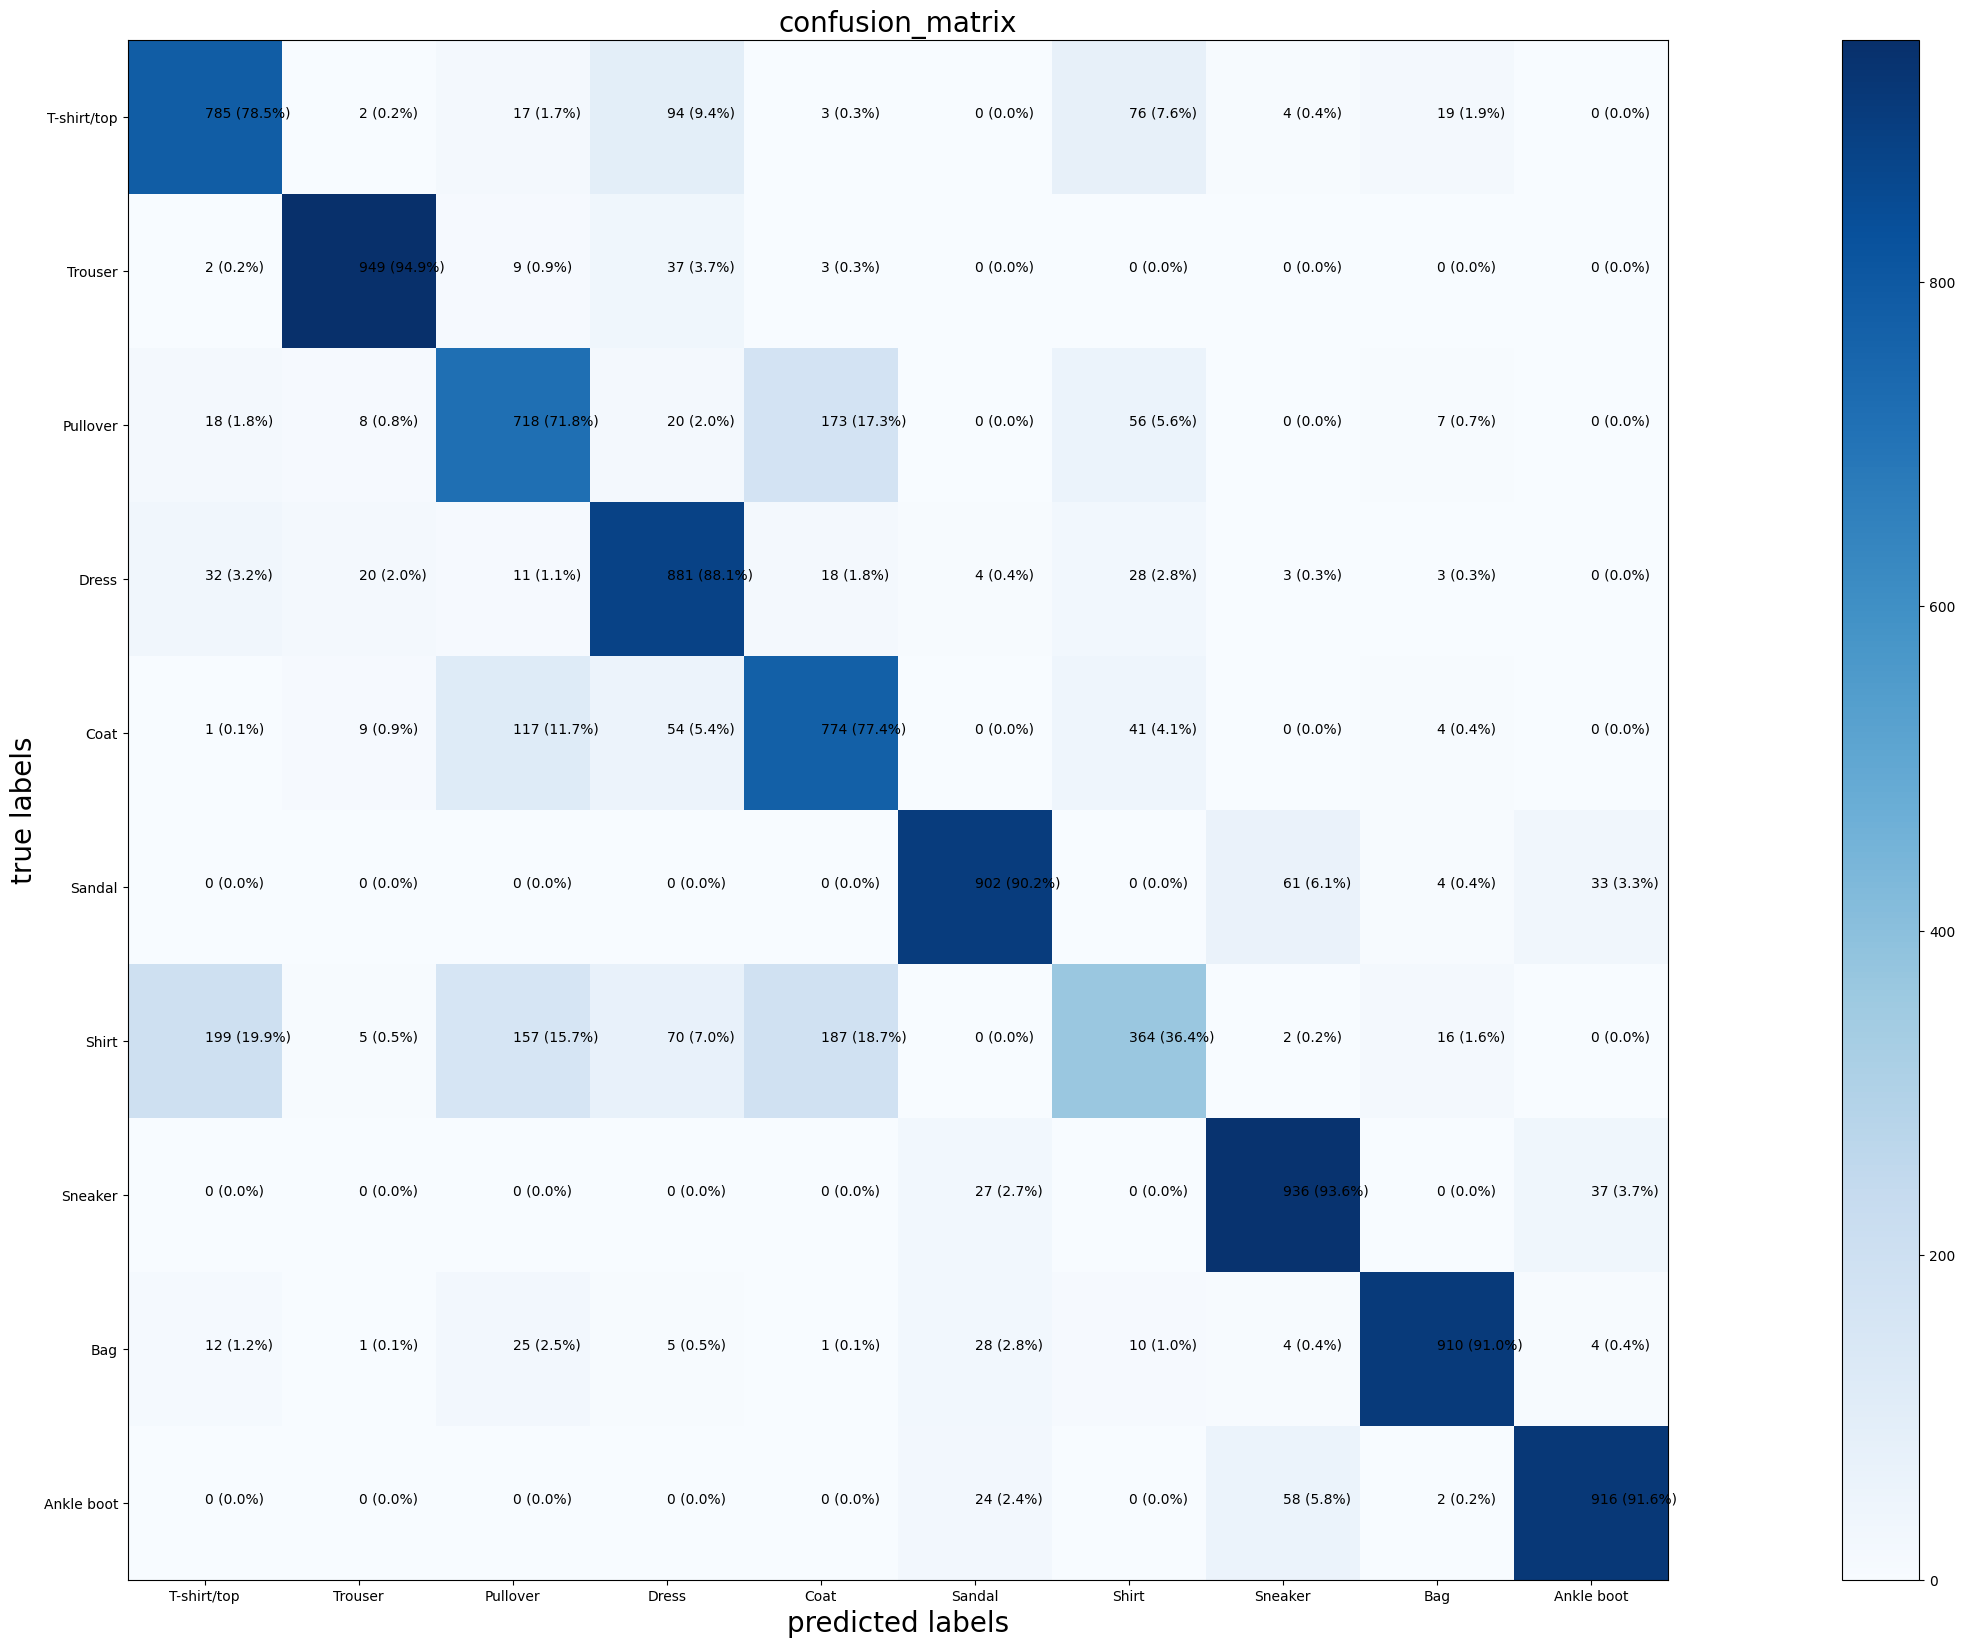

In [38]:
plot_confusion_matrix(
    y_test=test_label,
    y_pred=y_pred,
    classes= class_names,
    figsize = (45,20)
)

In [41]:
from tensorflow.python.ops.math_ops import greater_eager_fallback
#lets wwrite a function to predict the output fron the random variable

import random

def plot_random_image(model,images,true_label,classes):
  i = random.randint(0,len(images))
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_label[i]]
  plt.imshow(target_image,cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel(
      "Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color
  )


In [ ]:
plot_random_image(
    model = model_7,
    images= test_data,
    true_label= test_label,
    classes=class_names
)